# ML Model - Kampar renting price prediction

## GridSearch for the best parameter

In [339]:
kerR = KernelRidge(kernel='rbf')
kr = GridSearchCV(estimator=kerR,param_grid={"alpha": np.logspace(-5,2,8),"gamma": np.logspace(-2, 2, 5)})
kr.fit(X_train,y_train)
print('RBF Best Param= ',kr.best_params_)
print('RBF Best Score= ',abs(kr.best_score_))

RBF Best Param=  {'alpha': 1.0, 'gamma': 0.1}
RBF Best Score=  0.29093950217242026


In [343]:
elastic=ElasticNet(normalize=True)
elt=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=10,refit=True,cv=10)
elt.fit(X_train,y_train)
print('EltN Best Param= ',elt.best_params_)
print('EltN Best Score= ',abs(elt.best_score_))

EltN Best Param=  {'alpha': 0.01, 'l1_ratio': 0.2}
EltN Best Score=  261575.5755411284


## Train model

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('Data.csv')

num = df.drop(['Property_name','Category','lat','lng','Renting_price'],axis=1)
cat1 = df['Property_name']
cat2 = df['Category']

scaler = StandardScaler(copy = False)
scaler.fit(num)       
x_num = scaler.transform(num)

lb = preprocessing.LabelBinarizer()
x_cat1 = cat1
x_cat2 = cat2
lb.fit(x_cat1)
lb.fit(x_cat2)
x_cat1 = lb.transform(x_cat1)
x_cat2 = lb.transform(x_cat2)

x_train = np.hstack([x_num,x_cat1,x_cat2])
y_train = np.asarray(df['Renting_price'])

from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_train,y_train,test_size=0.2, random_state=42)

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=20,refit=True,cv=10)


# Regression 1 - ElasticNet

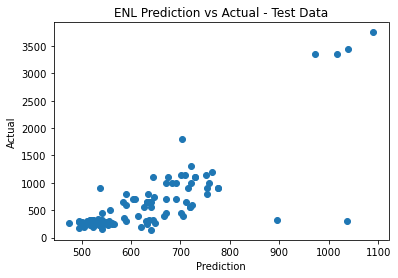

r2 score =  0.1022813006210268
rmse =  552.2495704700075


In [344]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True,alpha=0.1,l1_ratio=0.2)
elastic.fit(X_train,y_train)

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
y_pred=elastic.predict(X_train)
plt.scatter(y_pred,y_train)
plt.title('ENL Prediction vs Actual - Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()
r2=r2_score(y_true=y_test,y_pred=elastic.predict(X_test))
rmse=np.sqrt(mean_squared_error(y_true=y_train,y_pred=elastic.predict(X_train)))
print('r2 score = ',r2)
print('rmse = ',rmse)

# Regression 1 - Radial Basis Function

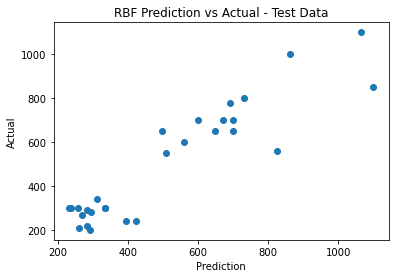

r2 score =  0.8437101882113607
rmse =  40.493513411235384


In [324]:
from sklearn.kernel_ridge import KernelRidge
ker = KernelRidge(kernel='rbf',alpha=0.001,gamma=0.1)
ker.fit(X_train,y_train)

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
y_pred=ker.predict(X_test)
plt.scatter(y_pred,y_test)
plt.title('RBF Prediction vs Actual - Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()
r2=r2_score(y_true=y_test,y_pred=ker.predict(X_test))
rmse=np.sqrt(mean_squared_error(y_true=y_train,y_pred=ker.predict(X_train)))
print('r2 score = ',r2)
print('rmse = ',rmse)